# **1. Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# **2. Load and Prepare Training Data**

In [2]:
df_train = pd.read_csv('/content/Titanic_train.csv')

df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


# **3. Handle Missing Values in Training Set**

In [3]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])


# **4. Encode Categorical Variables in Training Set**

In [4]:
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

# **5. Define Function to Plot Boxplot and Histogram**

In [5]:
def plot_boxplot_hist(data, column):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    sns.boxplot(x=data[column], color='salmon', ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    sns.histplot(data[column], kde=True, color='dodgerblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

# **6. Visualize Numeric Features in Training Set**

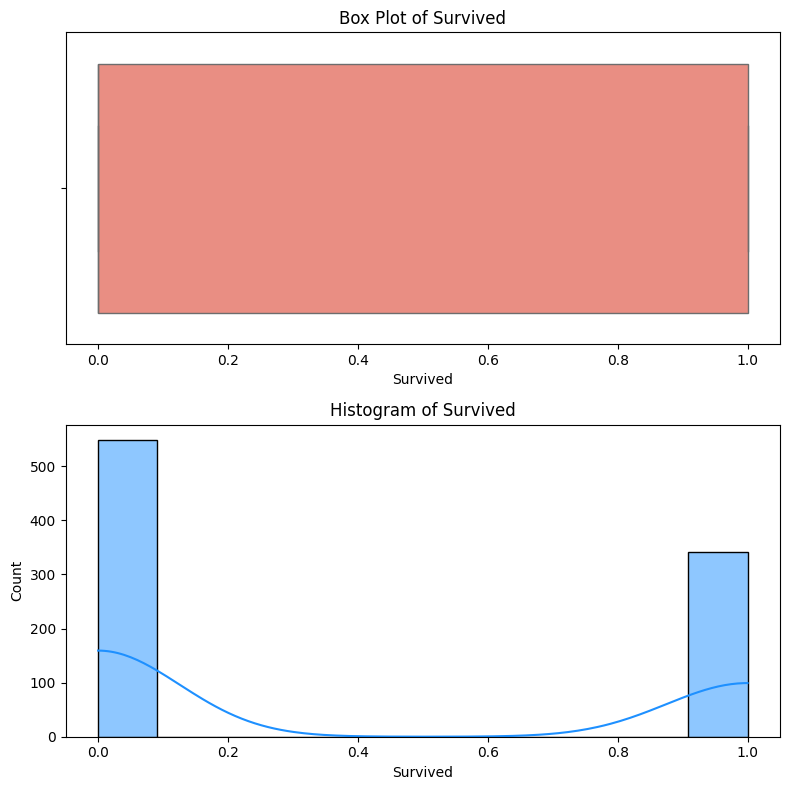

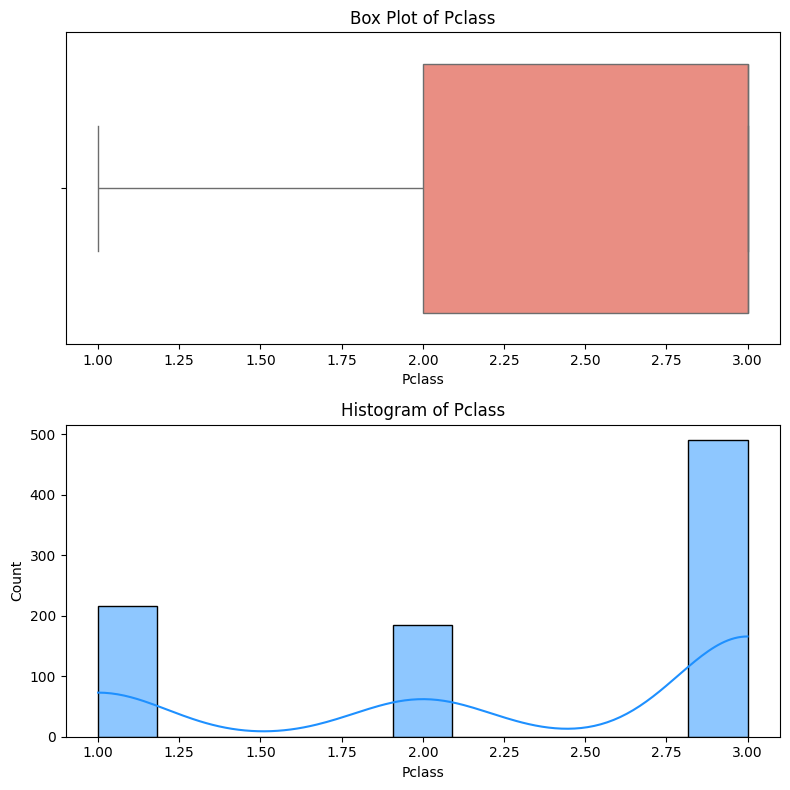

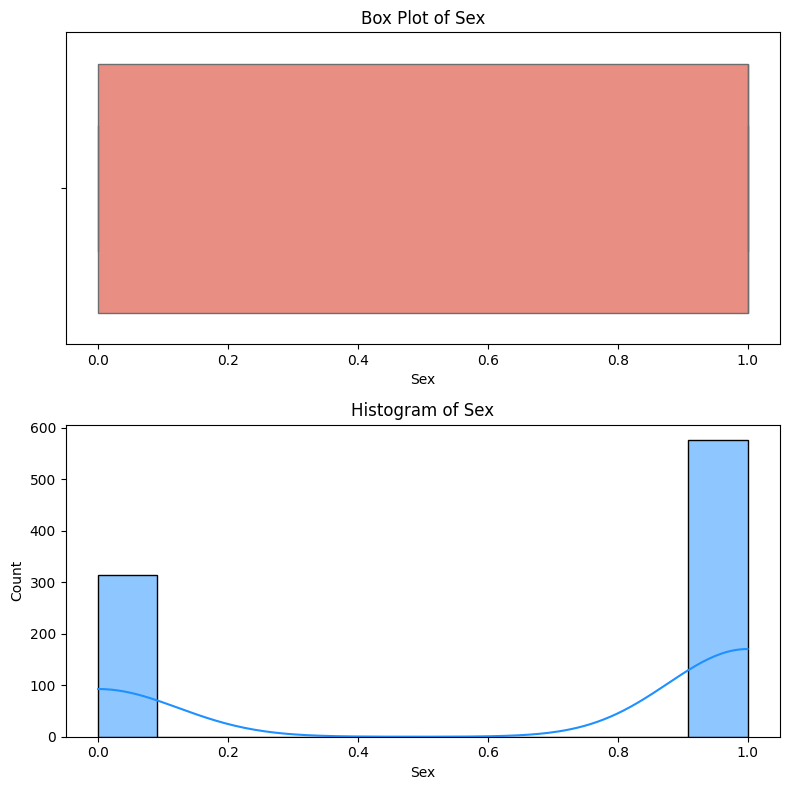

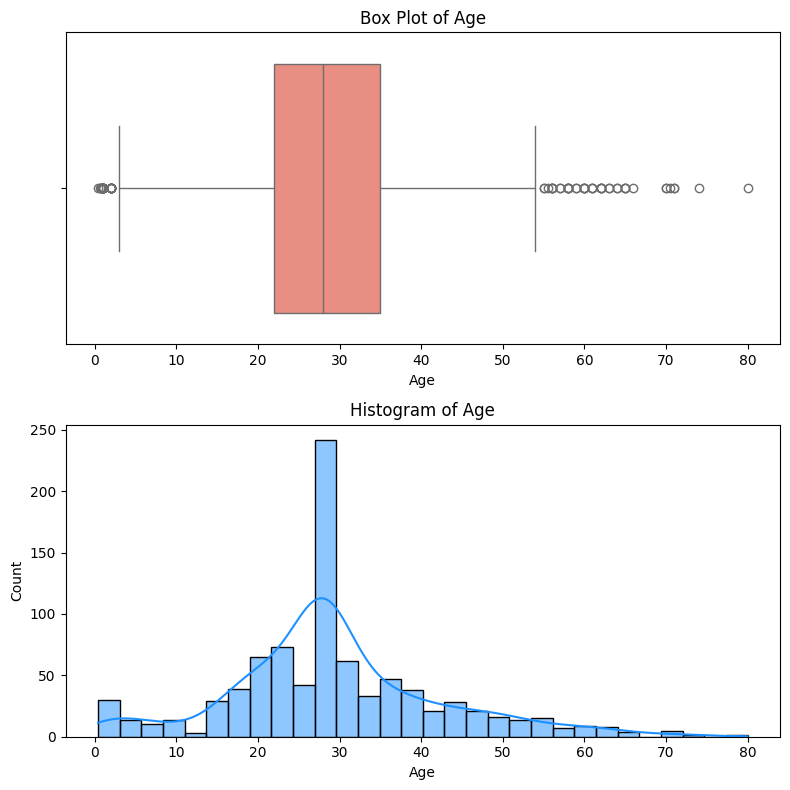

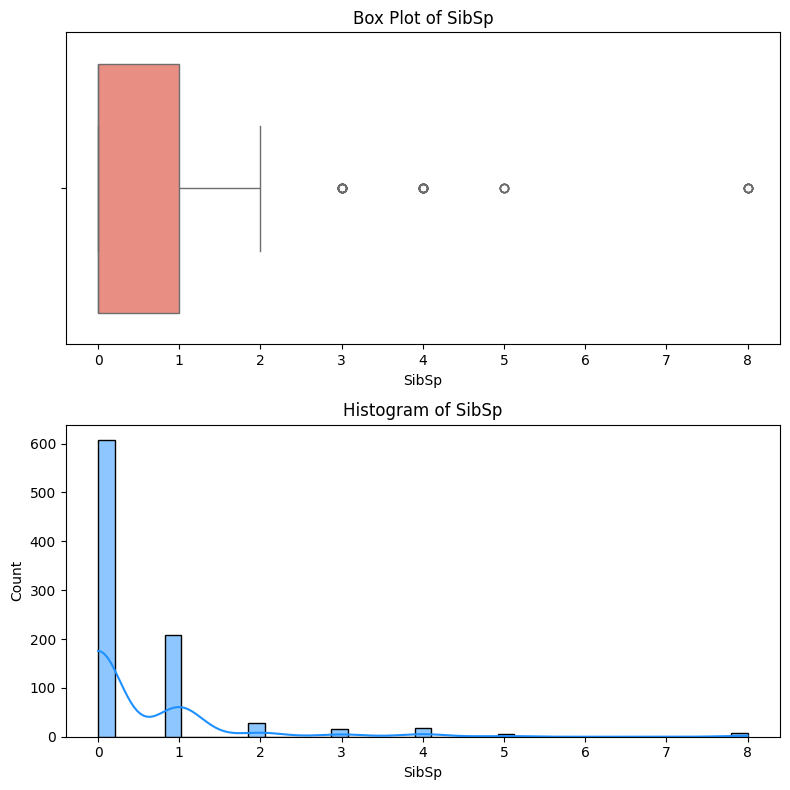

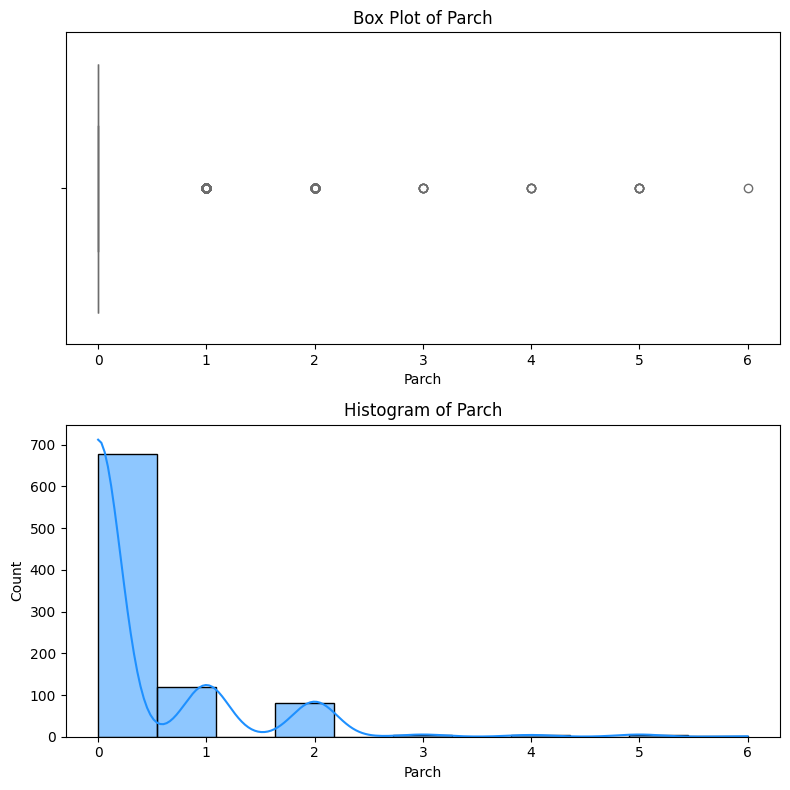

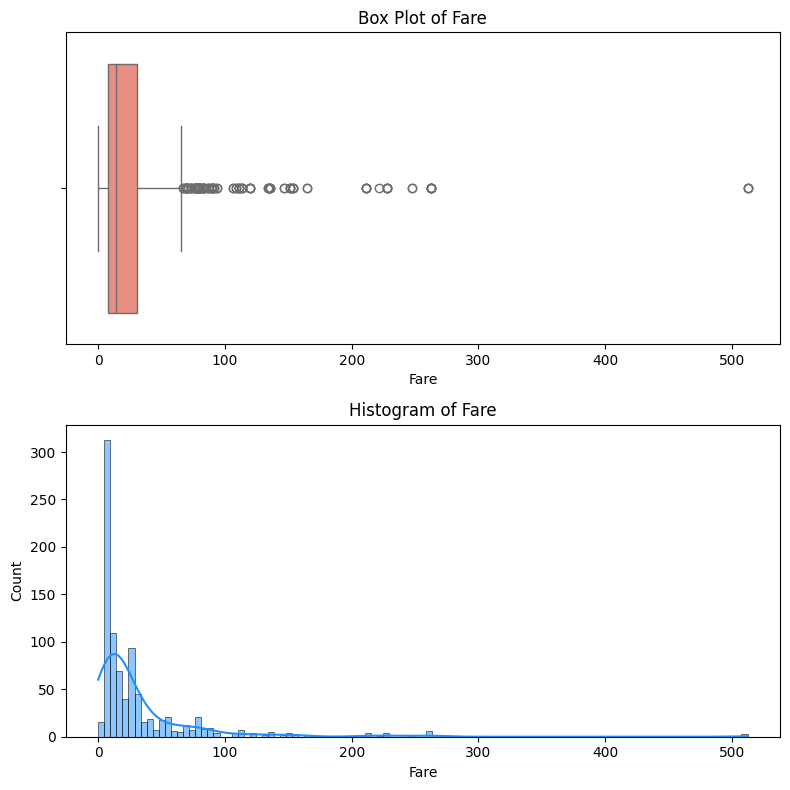

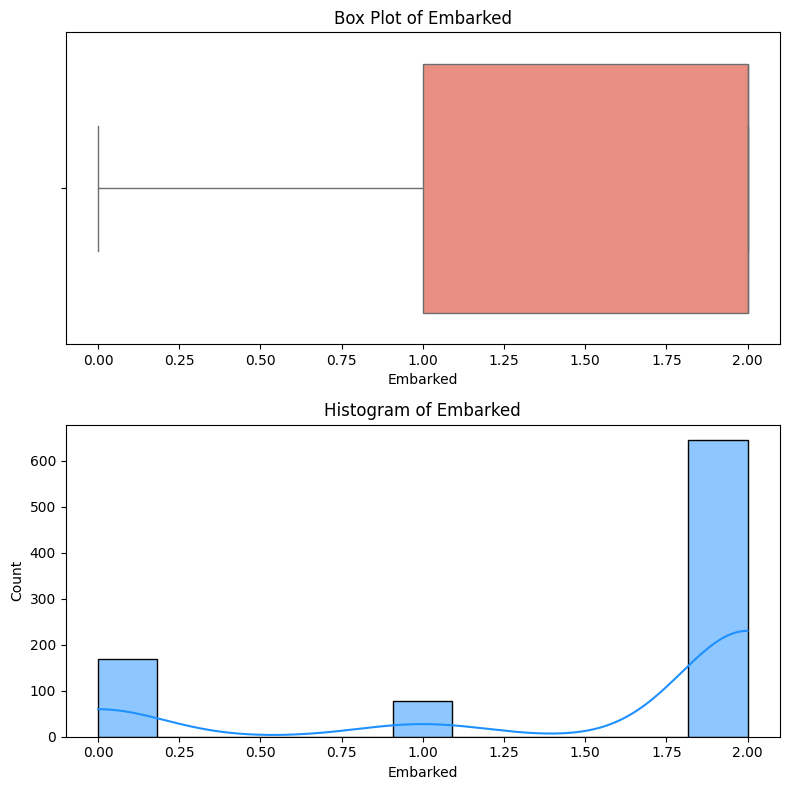

In [6]:
for col in df_train.select_dtypes(include=['int64', 'float64']).columns:
    plot_boxplot_hist(df_train, col)

# **7. Outlier Removal in Training Set Using IQR**

In [7]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_train = df_train[~((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)].reset_index(drop=True)

# **8. Correlation Heatmap - Training Set**

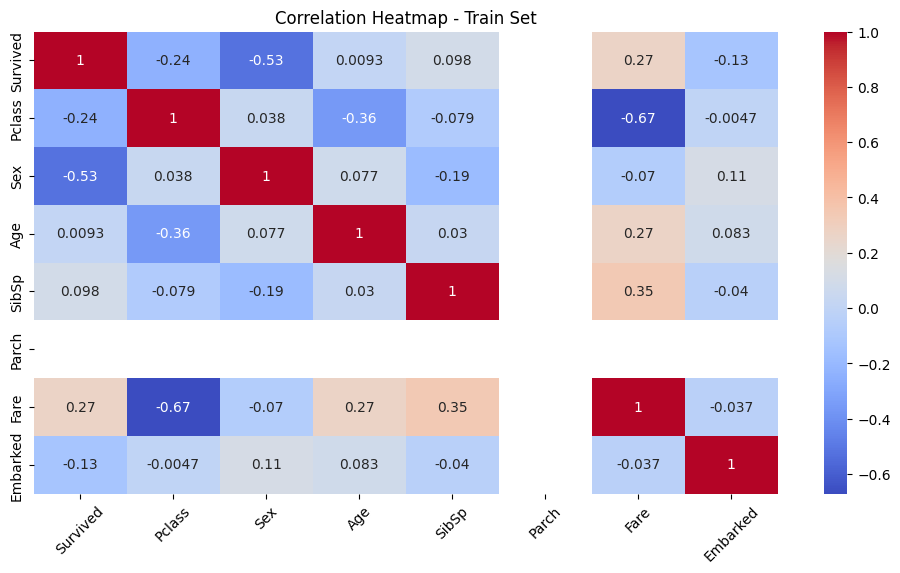

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap - Train Set')
plt.show()

# **9. Load and Prepare Test Data**

In [9]:
df_test = pd.read_csv('/content/Titanic_test.csv')

df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


# **10. Handle Missing Values in Test Set**

In [10]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())


# **11. Encode Categorical Variables in Test Set**

In [11]:
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

# **12. Visualize Numeric Features in Test Set**

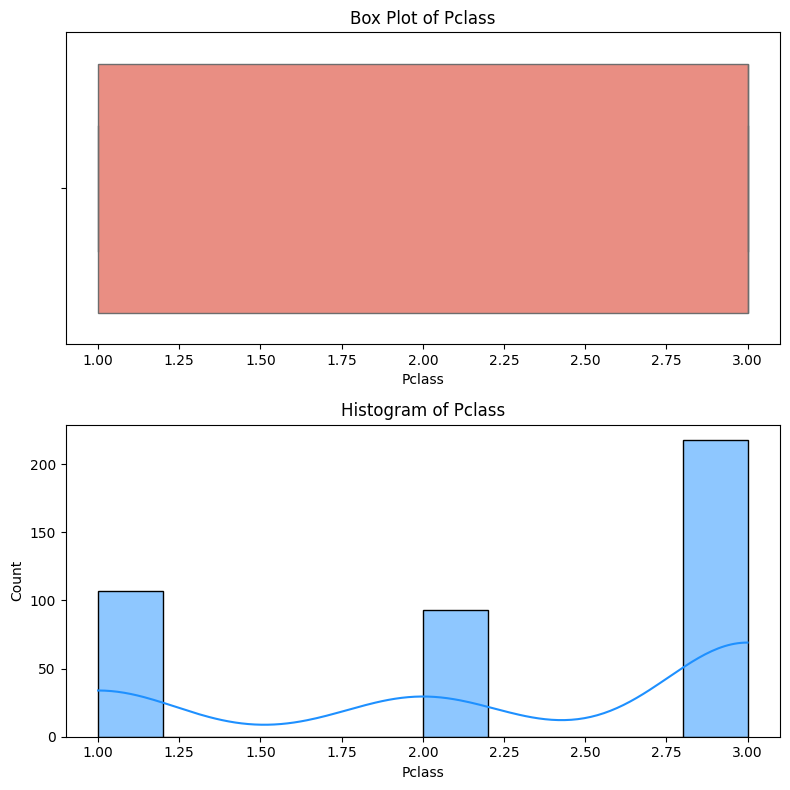

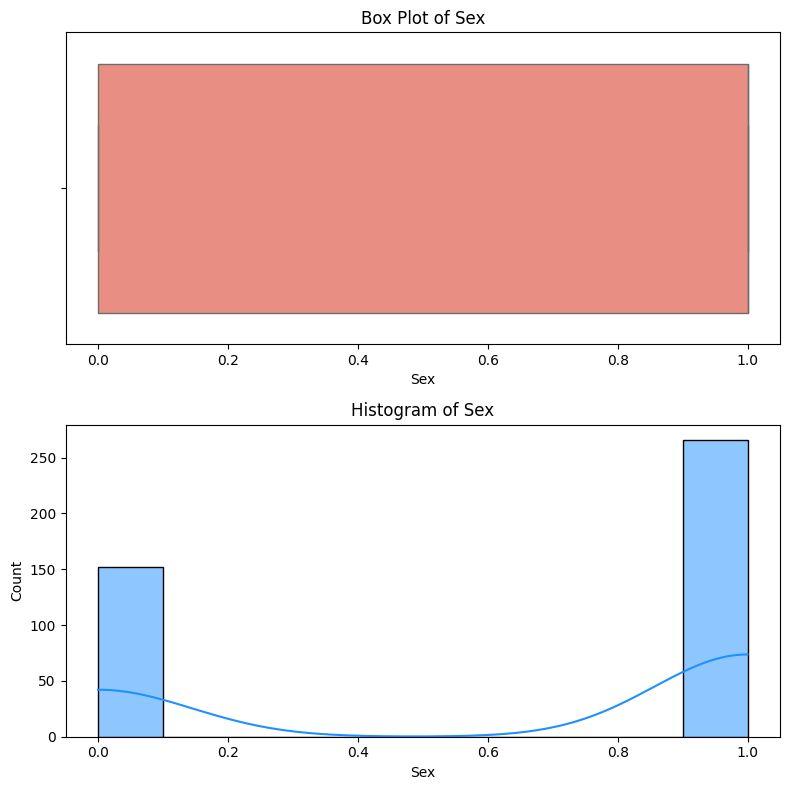

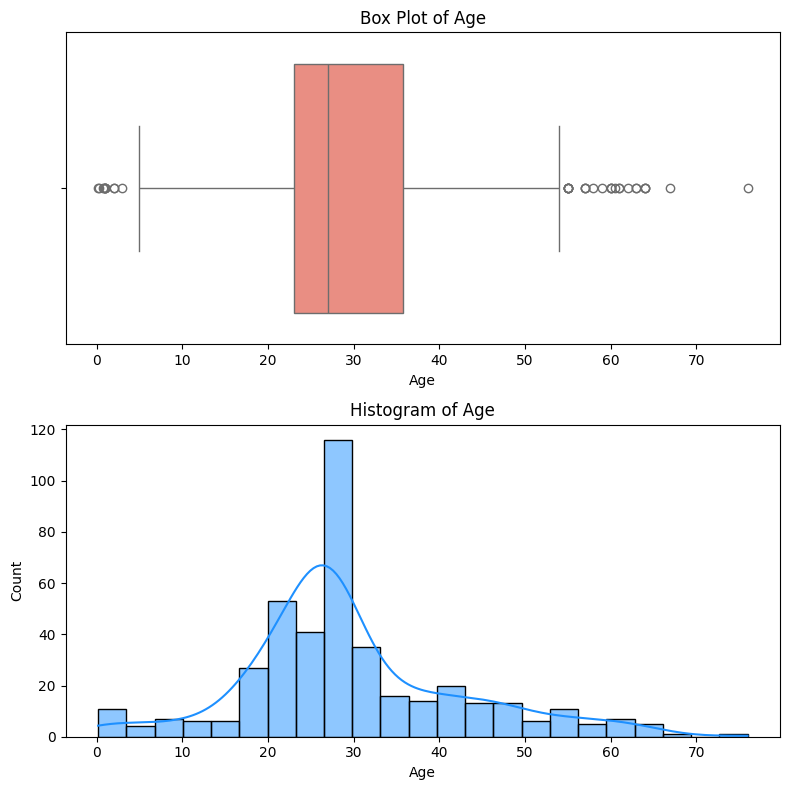

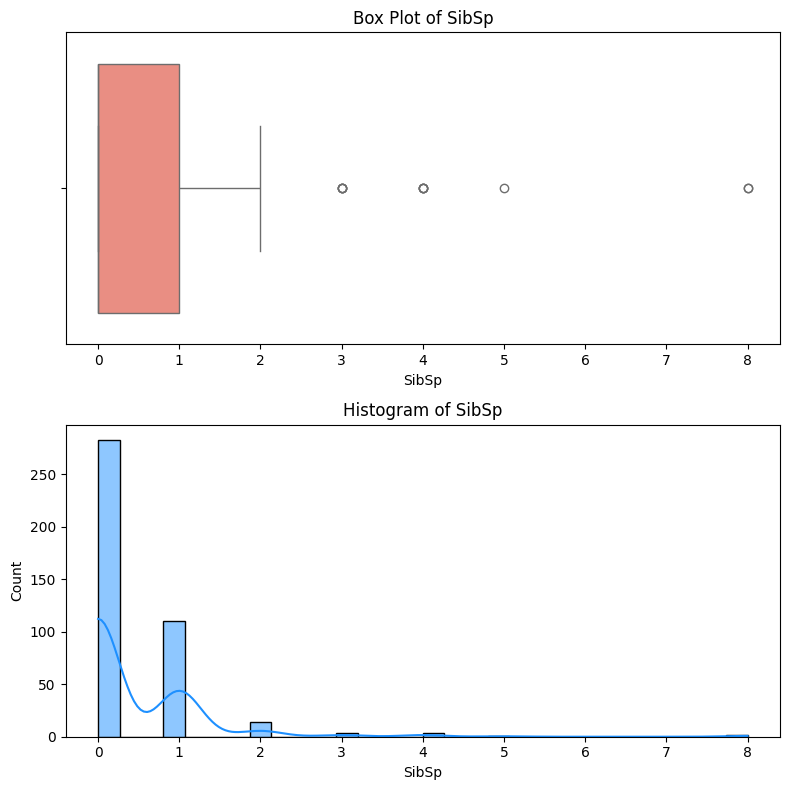

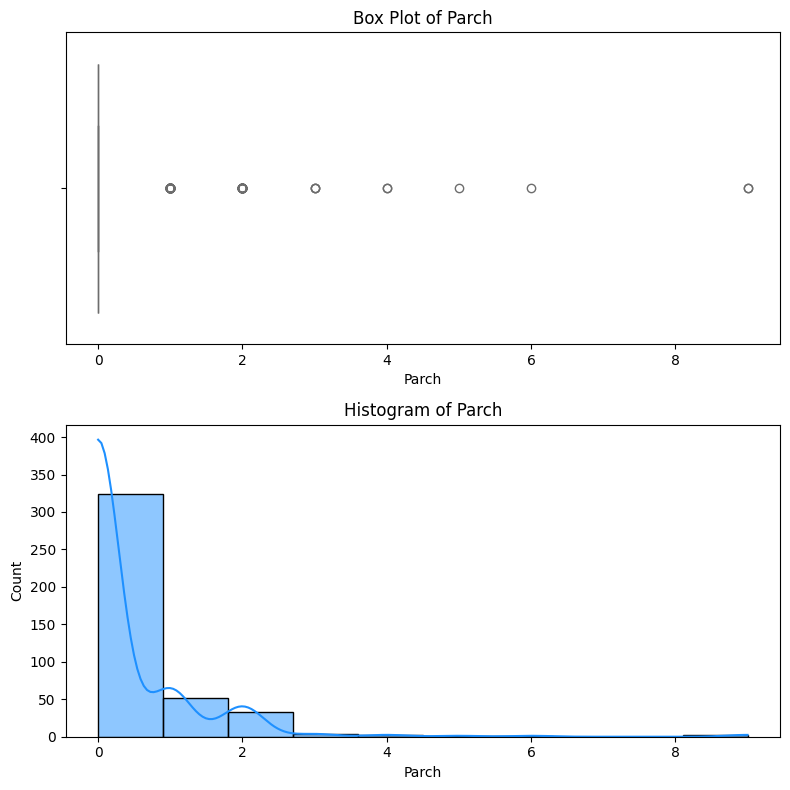

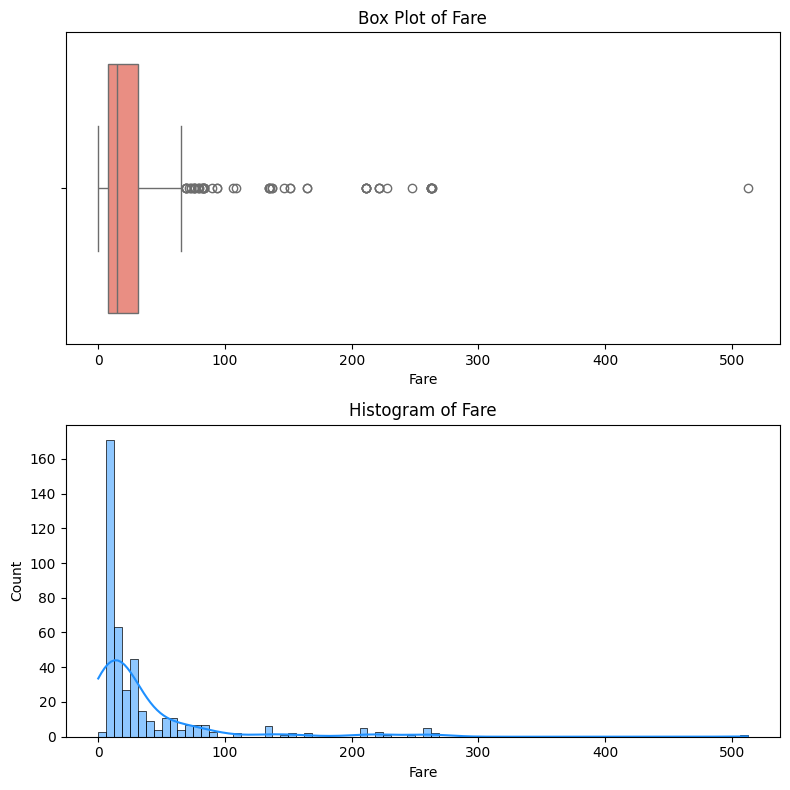

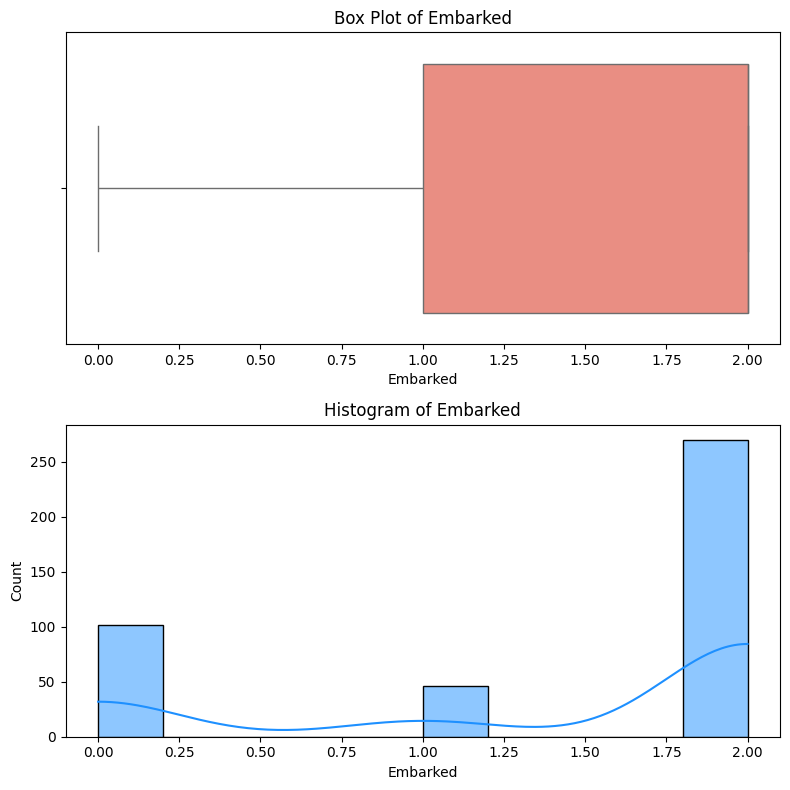

In [12]:
for col in df_test.select_dtypes(include=['int64', 'float64']).columns:
    plot_boxplot_hist(df_test, col)

# **13. Outlier Removal in Test Set Using IQR**

In [13]:
Q1_test = df_test.quantile(0.25)
Q3_test = df_test.quantile(0.75)
IQR_test = Q3_test - Q1_test
lower_bound_test = Q1_test - 1.5 * IQR_test
upper_bound_test = Q3_test + 1.5 * IQR_test
df_test = df_test[~((df_test < lower_bound_test) | (df_test > upper_bound_test)).any(axis=1)].reset_index(drop=True)

# **14. Correlation Heatmap - Test Set**

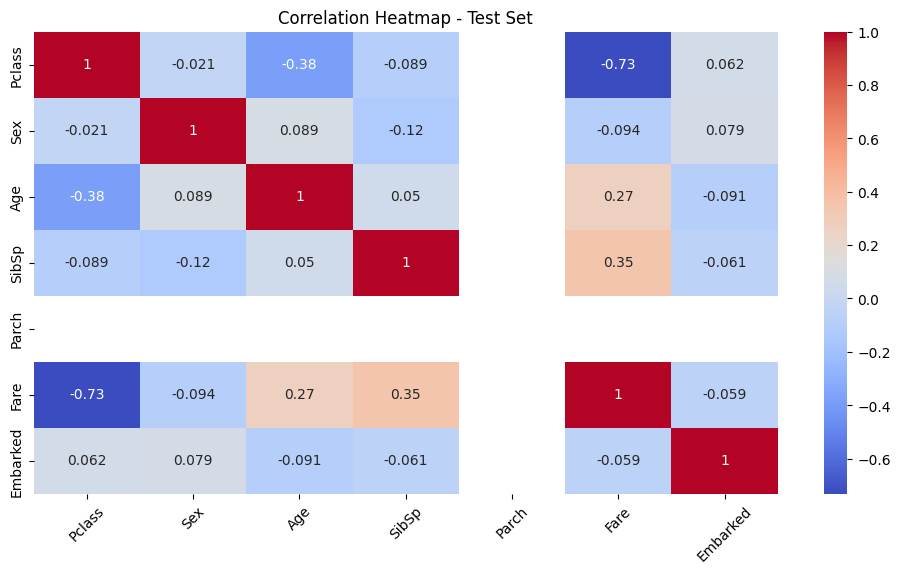

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap - Test Set')
plt.show()

# **15. Define Features and Target Variables**

In [15]:
X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = df_train['Survived']
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# **16. Standardize Feature Variables**

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **17. Build and Train Logistic Regression Model**

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# **18. Predict and Evaluate on Training Data**

In [18]:
y_train_pred = model.predict(X_train_scaled)
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.8024263431542461
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       404
           1       0.69      0.63      0.66       173

    accuracy                           0.80       577
   macro avg       0.77      0.75      0.76       577
weighted avg       0.80      0.80      0.80       577

Confusion Matrix:
 [[354  50]
 [ 64 109]]


# **19. Plot ROC Curve**

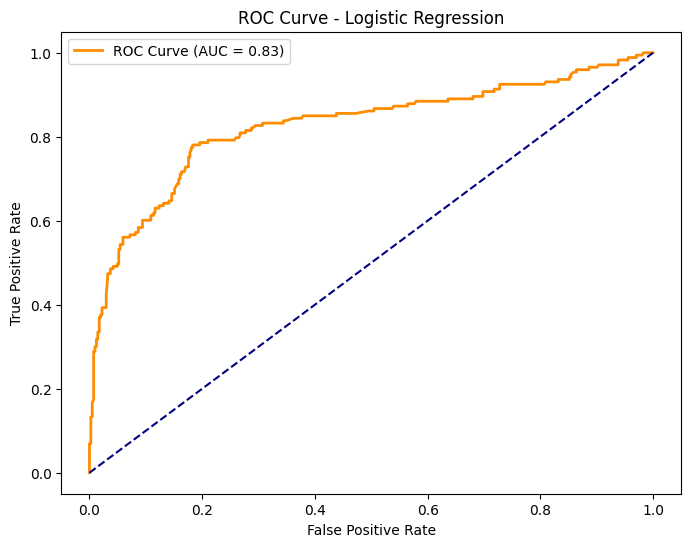

In [19]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba)
roc_auc = roc_auc_score(y_train, y_train_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# **20. Display Model Coefficients**

In [20]:
print(f"Intercept: {model.intercept_[0]}")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Intercept: -1.1195980721697054
Pclass: -0.3543
Sex: -1.2069
Age: -0.1108
SibSp: -0.2240
Parch: 0.0000
Fare: 0.5142
Embarked: -0.1934


# **21. PCA Visualization with Decision Boundary**

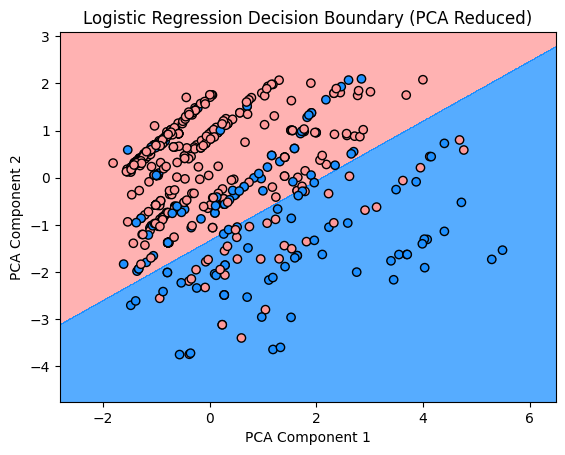

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
model.fit(X_train_pca, y_train)

X1, X2 = np.meshgrid(np.arange(X_train_pca[:, 0].min()-1, X_train_pca[:, 0].max()+1, 0.01),
                     np.arange(X_train_pca[:, 1].min()-1, X_train_pca[:, 1].max()+1, 0.01))

plt.contourf(X1, X2, model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['#FF9999', '#1E90FF']))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=ListedColormap(['#FF9999', '#1E90FF']), edgecolors='k')
plt.title('Logistic Regression Decision Boundary (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# **22. Save Trained Model and Scaler**

In [22]:
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# **23. Interview Questions**

In [23]:
print("""
1. What is the difference between Precision and Recall?
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "When the model predicts positive, how often is it correct?" Recall, on the other hand, is the ratio of correctly predicted positives to all actual positive cases. It answers: "Out of all actual positives, how many did the model identify correctly?" Precision is important when false positives are costly, while recall is crucial when missing true positives is more dangerous.

2. What is Cross-Validation, and why is it important in Binary Classification?
Cross-validation is a model evaluation technique that splits the dataset into multiple parts (called folds) to ensure the model performs well on unseen data. In K-Fold Cross-Validation, the data is divided into K equal parts; the model is trained on K-1 parts and tested on the remaining one, repeating this process K times. It is especially important in binary classification because it helps detect overfitting and ensures the model generalizes well, even when the classes are imbalanced.
""")



1. What is the difference between Precision and Recall?
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "When the model predicts positive, how often is it correct?" Recall, on the other hand, is the ratio of correctly predicted positives to all actual positive cases. It answers: "Out of all actual positives, how many did the model identify correctly?" Precision is important when false positives are costly, while recall is crucial when missing true positives is more dangerous.

2. What is Cross-Validation, and why is it important in Binary Classification?
Cross-validation is a model evaluation technique that splits the dataset into multiple parts (called folds) to ensure the model performs well on unseen data. In K-Fold Cross-Validation, the data is divided into K equal parts; the model is trained on K-1 parts and tested on the remaining one, repeating this process K times. It is especially important in bina